### This dataset has been provide as a course material in the Decodr course of Machine Learing,
The dataset contains 7176  observations and 5 features of a power plant set to work with full load. 
Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) 
and Exhaust Vacuum (V) being independent feature and net hourly electrical energy output (EP) being target / to be predictedfeature.

## IMPORT LIBRARIES

In [1]:
import numpy as np # numerical operations
import matplotlib.pyplot as plt # visualisation
import pandas as pd # analysis, manipulation IO
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## IMPORTING DATASETS

In [2]:
data=pd.read_csv('train.csv',delimiter=',')
data.head()

# T      V       AP     RH      EP
0   8.58  38.38  1021.03  84.37  482.26
1  21.79  58.20  1017.21  66.74  446.94
2  16.64  48.92  1011.55  78.76  452.56
3  31.38  71.32  1009.17  60.42  433.44
4   9.20  40.03  1017.05  92.46  480.38

### INITIAL ANALYSIS

In [3]:
data.shape

(7176, 5)

In [4]:
data.tail()

# T      V       AP     RH      EP
7171   9.32  37.73  1022.14  79.49  477.91
7172  11.20  41.38  1021.65  61.89  476.87
7173  29.80  69.34  1009.36  64.74  437.65
7174  16.37  54.30  1017.94  63.63  459.97
7175  30.11  62.04  1010.69  47.96  444.42

##EP COLUMN IS THE TARGET FEATURE TO BE PREDICTED, SO Y TRAIN DATA CREATED WITH EP VALUE AND DELETED FROM MAIN DATA

In [5]:
data.columns

Index(['# T', ' V', ' AP', ' RH', ' EP'], dtype='object')

In [6]:
y_train= data[' EP']

In [7]:
y1_train= data[' EP']

In [8]:
y2_train= data[' EP']

In [9]:
del data[' EP']

In [10]:
data.columns

Index(['# T', ' V', ' AP', ' RH'], dtype='object')

In [11]:
data.describe()

# T            V           AP           RH
count  7176.000000  7176.000000  7176.000000  7176.000000
mean     19.629712    54.288154  1013.263032    73.275818
std       7.475256    12.751468     5.964863    14.625093
min       1.810000    25.360000   992.890000    25.560000
25%      13.470000    41.740000  1009.010000    63.202500
50%      20.315000    52.050000  1012.910000    74.895000
75%      25.720000    66.540000  1017.302500    84.925000
max      35.770000    81.560000  1033.300000   100.160000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   # T     7176 non-null   float64
 1    V      7176 non-null   float64
 2    AP     7176 non-null   float64
 3    RH     7176 non-null   float64
dtypes: float64(4)
memory usage: 224.4 KB


### NO null values in dataset

In [13]:
data.isna().sum()

# T    0
 V     0
 AP    0
 RH    0
dtype: int64

## EDA

In [14]:
y_train.shape,y1_train.shape

((7176,), (7176,))

In [15]:
y_train.describe()# STATISICAL DATA OF FEATURE TO BE PREDICTED.

count    7176.000000
mean      454.431293
std        17.134571
min       420.260000
25%       439.737500
50%       451.740000
75%       468.667500
max       495.760000
Name:  EP, dtype: float64

In [16]:
q25=np.percentile(y_train,25)
q75=np.percentile(y_train,75)
IQr=q75-q25
print('Q1 :',q25,'Q3:',q75,'IQR :',IQr)

Q1 : 439.7375 Q3: 468.6675 IQR : 28.930000000000007


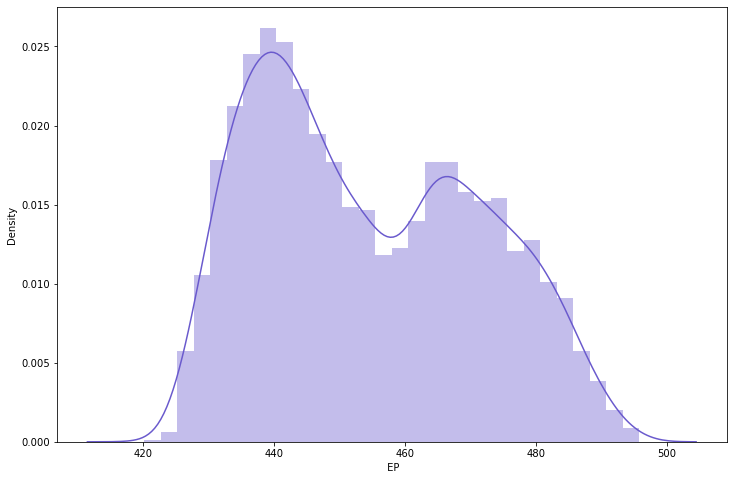

In [17]:
#sns.set(rc={'figure.figsize':(12,8)})
plt.figure(figsize=(12,8))
sns.distplot(y_train, bins=30, color='Slateblue')
plt.show()

## CORRELATION STUDY

In [18]:
corr_df=data.copy()

In [19]:
corr_df['EP'] =y_train

In [20]:
corr_df

# T      V       AP     RH      EP
0      8.58  38.38  1021.03  84.37  482.26
1     21.79  58.20  1017.21  66.74  446.94
2     16.64  48.92  1011.55  78.76  452.56
3     31.38  71.32  1009.17  60.42  433.44
4      9.20  40.03  1017.05  92.46  480.38
...     ...    ...      ...    ...     ...
7171   9.32  37.73  1022.14  79.49  477.91
7172  11.20  41.38  1021.65  61.89  476.87
7173  29.80  69.34  1009.36  64.74  437.65
7174  16.37  54.30  1017.94  63.63  459.97
7175  30.11  62.04  1010.69  47.96  444.42

[7176 rows x 5 columns]

In [21]:
corr_df.corr()

# T         V        AP        RH        EP
# T  1.000000  0.845382 -0.509115 -0.545312 -0.948457
 V   0.845382  1.000000 -0.417346 -0.315595 -0.869620
 AP -0.509115 -0.417346  1.000000  0.101367  0.519887
 RH -0.545312 -0.315595  0.101367  1.000000  0.392988
EP  -0.948457 -0.869620  0.519887  0.392988  1.000000

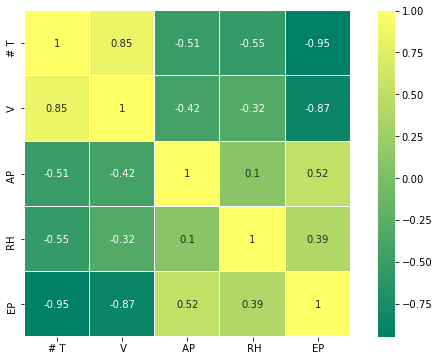

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.astype('float32').corr(),linewidth=0.2,square=True,annot=True,cmap='summer')
plt.show()

# FEATURESPLOT

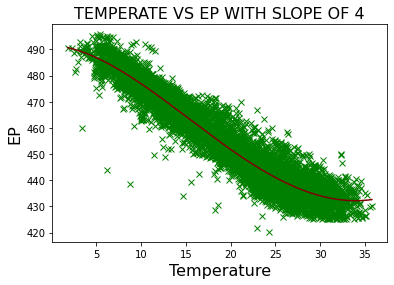

In [23]:
plt.plot(corr_df["# T"],corr_df["EP"], 'x', color='green') # x us type of datapoints
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df["# T"], corr_df['EP'], 4))# slope 4
         (np.unique(corr_df['# T'])), color='maroon')
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.title('TEMPERATE VS EP WITH SLOPE OF 4',fontsize=16)
plt.show()

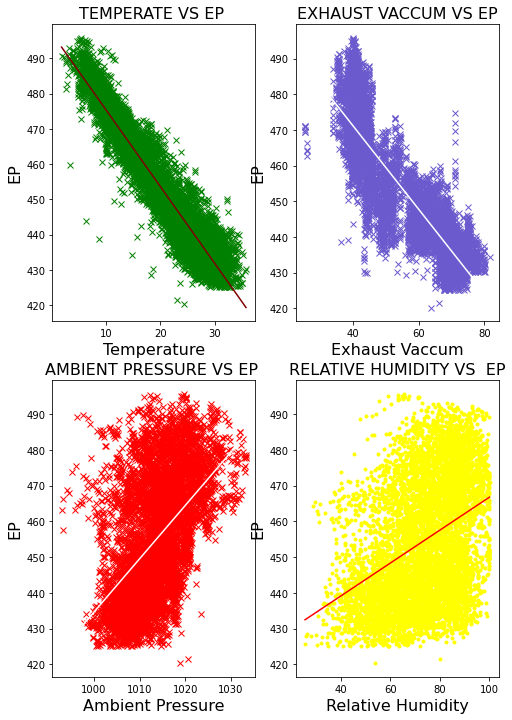

In [24]:
plt.figure(figsize=(8,12))
plt.subplot(2,2,1)
plt.plot(corr_df["# T"],corr_df["EP"], 'x', color='green')
plt.plot(np.unique(corr_df['# T']), np.poly1d(np.polyfit(corr_df["# T"], corr_df['EP'], 1))#slope 1
         (np.unique(corr_df['# T'])), color='maroon')
plt.xlabel("Temperature", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.title('TEMPERATE VS EP ',fontsize=16)
plt.subplot(2,2,2)
plt.plot(corr_df[" V"],corr_df["EP"], 'x', color='Slateblue')
plt.plot(np.unique(corr_df[' V']), np.poly1d(np.polyfit(corr_df[" V"], corr_df['EP'], 1))
         (np.unique(corr_df[' V'])), color='White')
plt.xlabel("Exhaust Vaccum", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.title('EXHAUST VACCUM VS EP',fontsize=16)
plt.subplot(2,2,3)
plt.plot(corr_df[" AP"],corr_df["EP"], 'x', color='Red')
plt.plot(np.unique(corr_df[' AP']), np.poly1d(np.polyfit(corr_df[" AP"], corr_df['EP'], 1))
         (np.unique(corr_df[' AP'])), color='White')
plt.xlabel("Ambient Pressure", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.title('AMBIENT PRESSURE VS EP ',fontsize=16)
plt.subplot(2,2,4)
plt.plot(corr_df[" RH"],corr_df["EP"], '.', color='yellow')
plt.plot(np.unique(corr_df[' RH']), np.poly1d(np.polyfit(corr_df[" RH"], corr_df['EP'], 1))
         (np.unique(corr_df[' RH'])), color='red')
plt.xlabel("Relative Humidity", fontsize=16)
plt.ylabel("EP", fontsize=16)
plt.title('RELATIVE HUMIDITY VS  EP',fontsize=16)
plt.show()

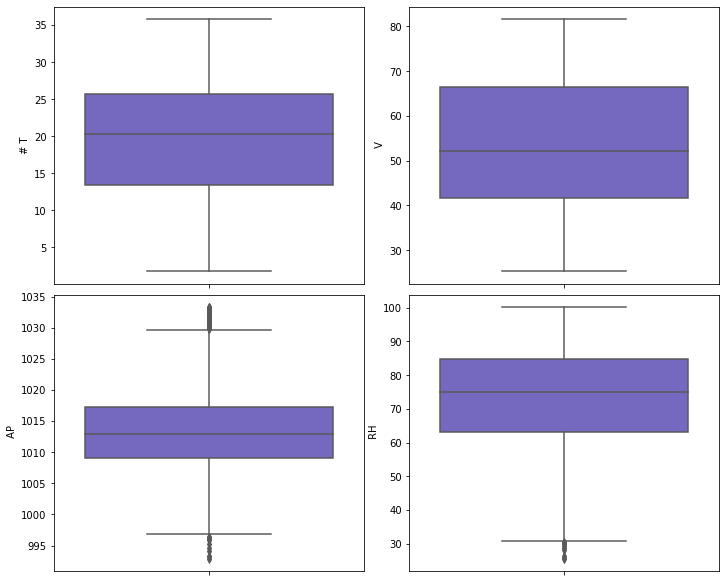

In [25]:
fig, axs =plt.subplots(ncols=2, nrows=2, figsize=(10,8))
index=0
axs = axs.flatten()
for i,v in data.items():
    sns.boxplot(y=i, data=data, ax=axs[index], color='Slateblue')
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

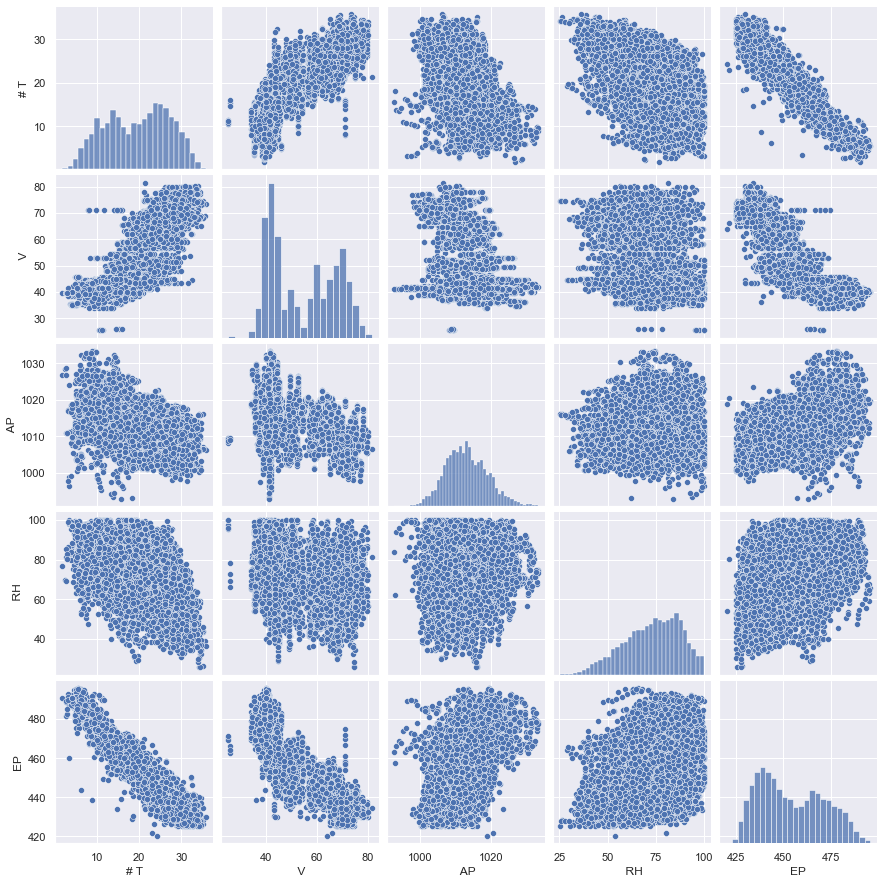

In [26]:
sns.set(style='darkgrid')
sns.pairplot(corr_df)
plt.tight_layout
plt.show()

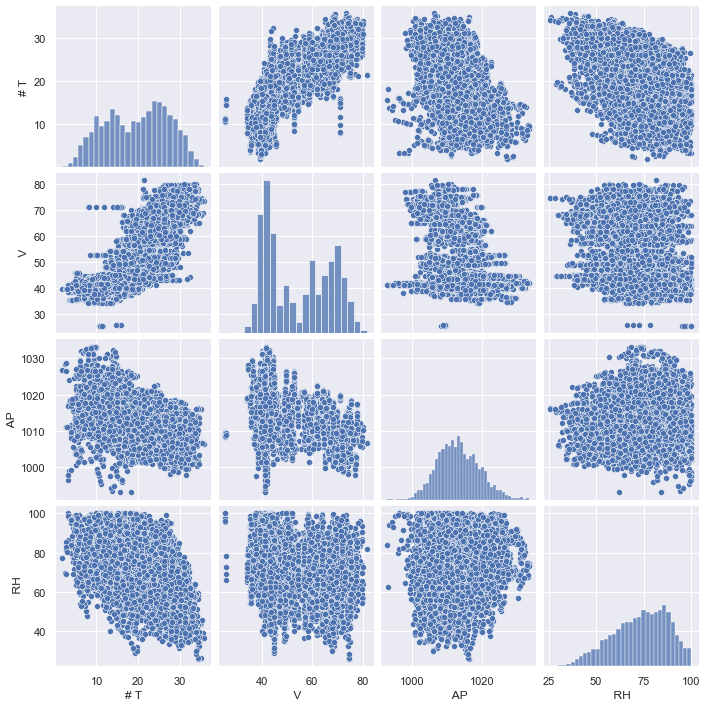

In [27]:
sns.set(style='darkgrid')
sns.pairplot(data)
plt.tight_layout
plt.show()

## FEATURE SCALING

In [28]:
#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance
#so that each feature is equally important and make it easier to process by most ML algorithms. 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.47827466e+00, -1.24764165e+00,  1.30221067e+00,
         7.58624590e-01],
       [ 2.89012041e-01,  3.06797549e-01,  6.61749044e-01,
        -4.46921842e-01],
       [-3.99975582e-01, -4.21012529e-01, -2.87207194e-01,
         3.75010552e-01],
       ...,
       [ 1.36062192e+00,  1.18048335e+00, -6.54382840e-01,
        -5.83682640e-01],
       [-4.36097263e-01,  9.29089763e-04,  7.84140927e-01,
        -6.59584883e-01],
       [ 1.40209496e+00,  6.07960340e-01, -4.31394890e-01,
        -1.73110573e+00]])

### USING LINEAR REGRESSION MODEL

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train = data
x1_train=data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.3, random_state=0)
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_train,y1_train,test_size=0.2, random_state=0)


In [32]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5023, 4), (2153, 4), (5023,), (2153,))

In [33]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((5740, 4), (1436, 4), (5740,), (1436,))

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [35]:
regression1 = LinearRegression()
regression1.fit(x1_train,y1_train)

LinearRegression()

In [36]:
y_pred = regression.predict(x_test)
y1_pred = regression1.predict(x1_test)

In [37]:
y_pred.shape,y1_pred.shape

((2153,), (1436,))

### Evaluating the model

In [38]:
print('regression score for traintest split with testsize of  0.3  is :',regression.score(x_test, y_test))
print('regression score for traintest split with testsize of  0.2 is :',regression1.score(x1_test, y1_test))

regression score for traintest split with testsize of  0.3  is : 0.930963257851112
regression score for traintest split with testsize of  0.2 is : 0.9295025788888989


In [39]:
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

In [40]:
#The best output possible here is 0.
print('Test size 0.3-Max Error:',max_error(y_test,y_pred))
print('Test size 0.3-MAE:', mean_absolute_error(y_test,y_pred))
print ('Test size 0.3-MSE:',mean_squared_error(y_test,y_pred))
print('Test size 0.3-Median absolute error:',median_absolute_error(y_test,y_pred))
print('Test size 0.3-R2 score',r2_score(y_test,y_pred))

Test size 0.3-Max Error: 18.061906610279664
Test size 0.3-MAE: 3.5737348877438144
Test size 0.3-MSE: 19.704941308467138
Test size 0.3-Median absolute error: 3.091597237849612
Test size 0.3-R2 score 0.930963257851112


In [41]:
print('Test size 0.2-Max Error:',max_error(y1_test,y1_pred))
print('Test size 0.2-MAE:', mean_absolute_error(y1_test,y1_pred))
print ('Test size 0.2-MSE:',mean_squared_error(y1_test,y1_pred))
print('Test size 0.2-Median absolute error:',median_absolute_error(y1_test,y1_pred))
print('Test size 0.2-R2 score',r2_score(y1_test,y1_pred))

Test size 0.2-Max Error: 17.758995025452805
Test size 0.2-MAE: 3.641520704401655
Test size 0.2-MSE: 20.33874624056846
Test size 0.2-Median absolute error: 3.154524701432564
Test size 0.2-R2 score 0.9295025788888989


## Inference

The R2 score helps us find the relationship between the independent variable towards the dependent variable.
With test sample size 80:20 we are getting a maginally better score. However there is a  very large error in the 
prediction compared to the error values , which has to tend to zero for the best fit.